In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('mushroom.csv')

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe(include='all')

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000
unique,NaN,5,4,9,2,9,4,3,2,12,...,2,4,3,8,9,6,7,2,NaN,NaN
top,NaN,sunken,scaly,brown,yes,foul,free,distant,narrow,orange,...,universal,white,one,sheathing,brown,abundant,urban,poisonous,NaN,NaN
freq,NaN,439,568,263,1023,274,540,677,1007,216,...,1010,553,689,305,255,360,316,1400,NaN,NaN
mean,624.974000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.449118,12.314345
std,375.091938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.697217,7.048845
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
25%,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.291009,5.723521
50%,607.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.318596,12.124902
75%,957.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.781272,18.698605


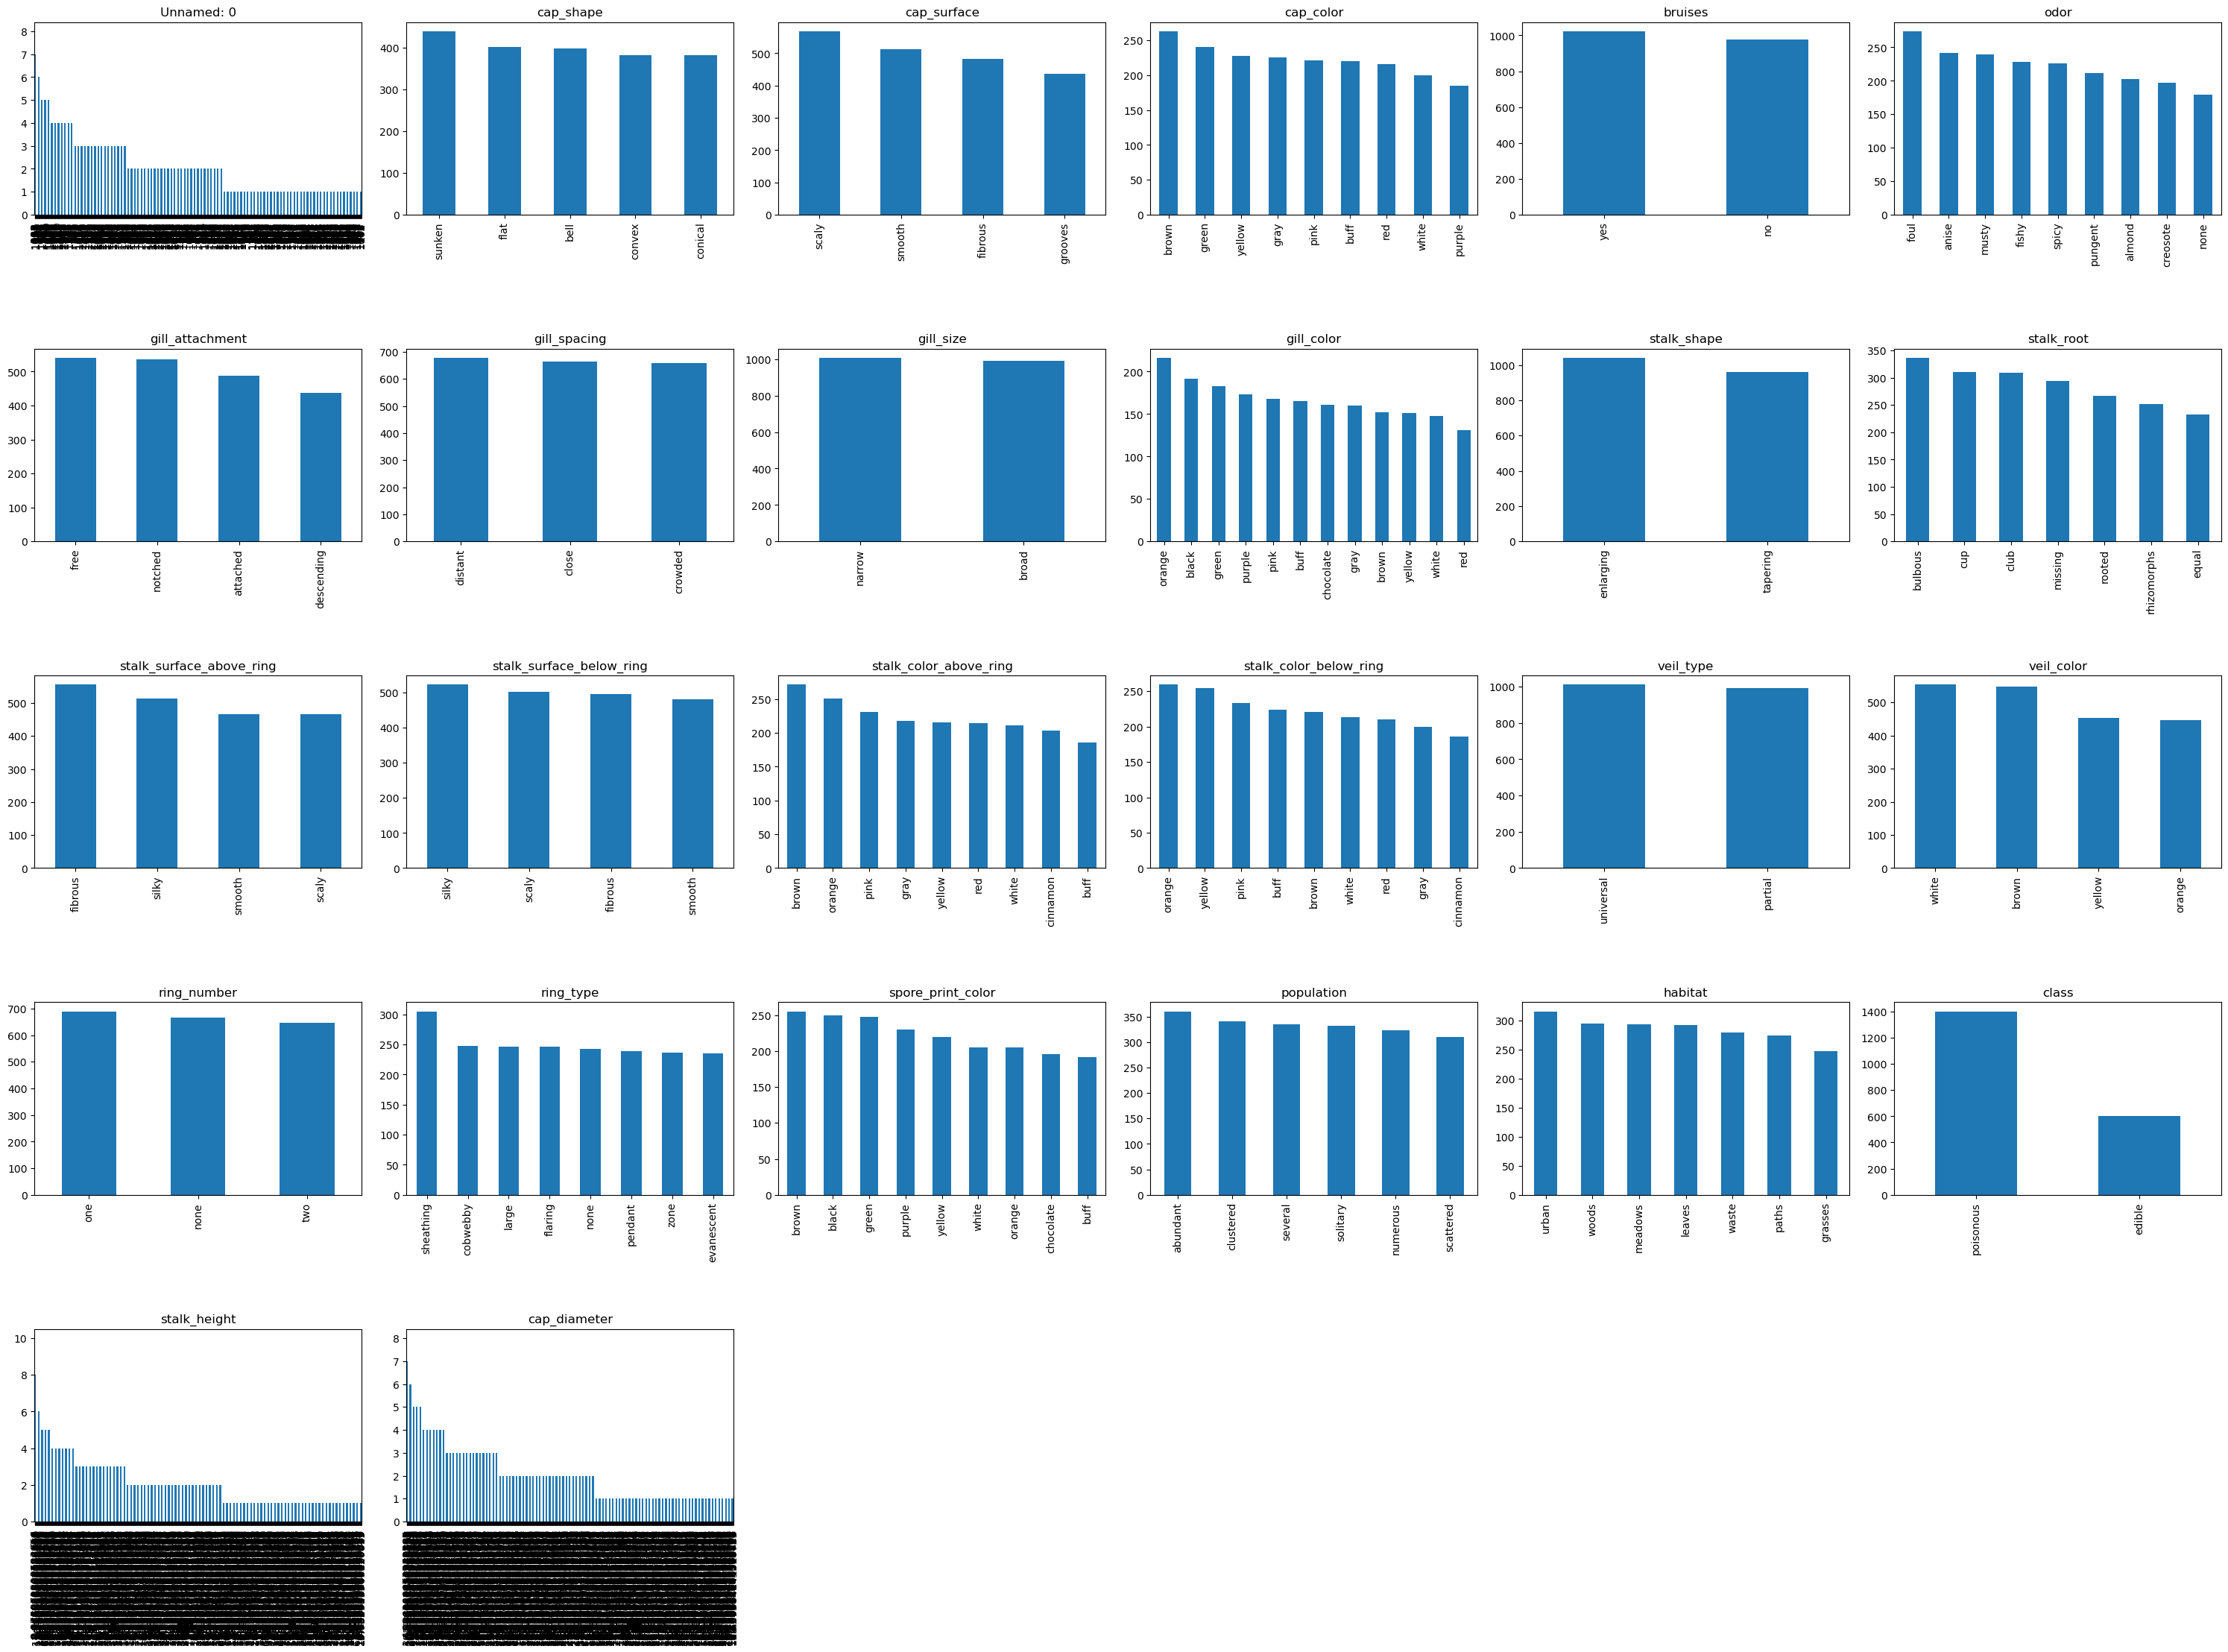

In [6]:
# Set the plot size
plt.figure(figsize=(30, 25))

# Plot histograms for each feature
for i, column in enumerate(df.columns):
    plt.subplot(6, 6, i + 1)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

plt.tight_layout()
plt.show()

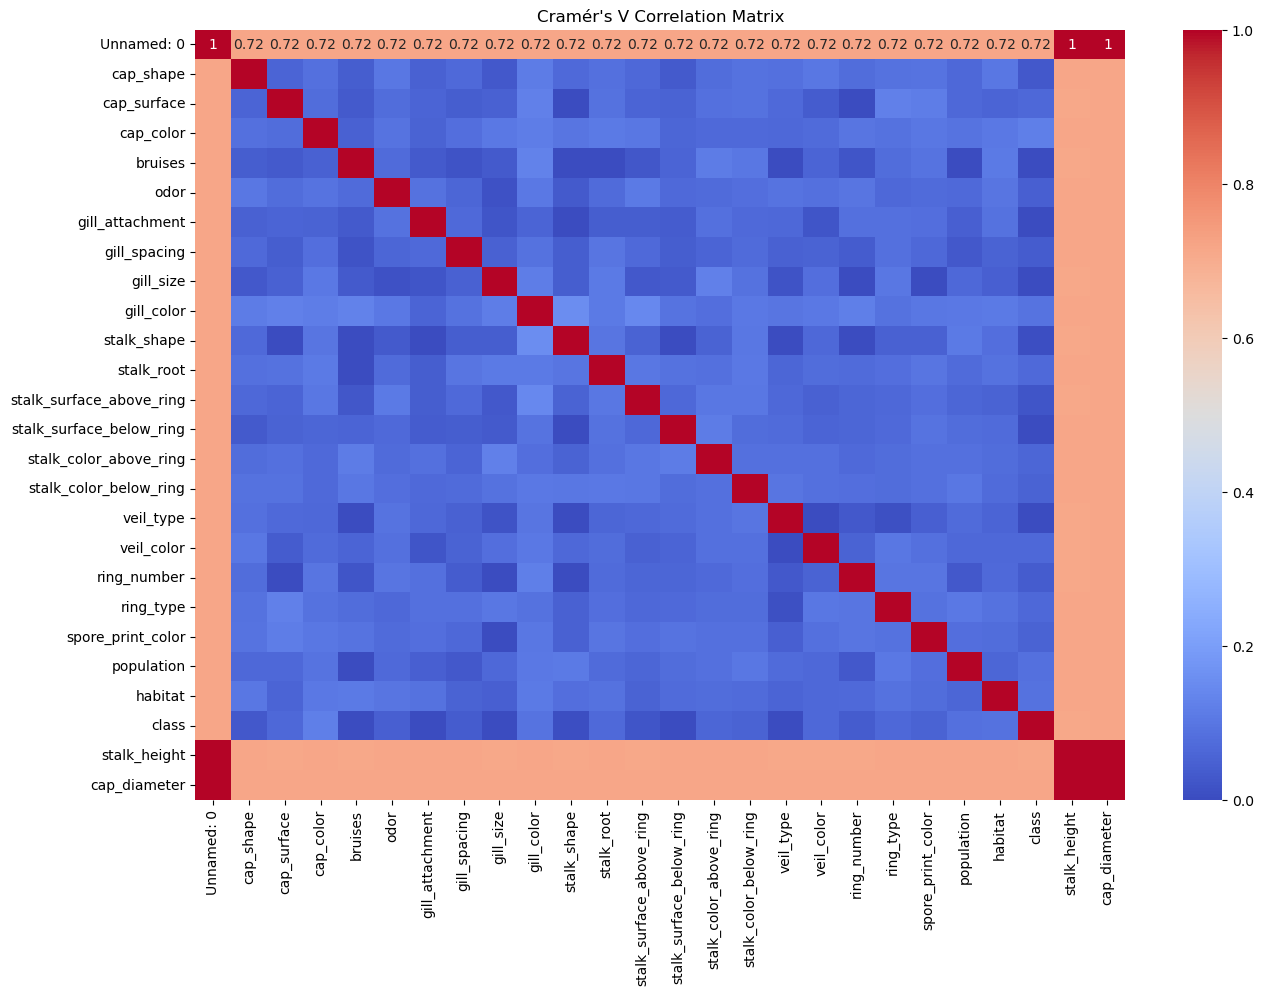

In [7]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for each pair of features
cramers_v_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Display the correlation matrix
cramers_v_matrix = cramers_v_matrix.astype(float)
plt.figure(figsize=(15, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix")
plt.show()

## Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [9]:
df['cap_shape'].unique()

array(['sunken', 'flat', 'bell', 'convex', 'conical'], dtype=object)

In [10]:
df['cap_surface'].unique()

array(['scaly', 'fibrous', 'grooves', 'smooth'], dtype=object)

In [11]:
df['cap_color'].unique()

array(['white', 'red', 'purple', 'pink', 'yellow', 'brown', 'green',
       'buff', 'gray'], dtype=object)

In [12]:
df['bruises'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
df['odor'].unique()

array(['anise', 'foul', 'fishy', 'musty', 'spicy', 'none', 'pungent',
       'almond', 'creosote'], dtype=object)

In [14]:
df['cap_shape'].unique()

array(['sunken', 'flat', 'bell', 'convex', 'conical'], dtype=object)

In [15]:
df['gill_attachment'].unique()

array(['descending', 'notched', 'free', 'attached'], dtype=object)

In [16]:
df['gill_spacing'].unique()

array(['distant', 'crowded', 'close'], dtype=object)

In [17]:
df['gill_size'].unique()

array(['broad', 'narrow'], dtype=object)

In [18]:
df['gill_color'].unique()

array(['pink', 'chocolate', 'purple', 'orange', 'buff', 'black', 'red',
       'green', 'brown', 'yellow', 'white', 'gray'], dtype=object)

In [19]:
df['stalk_shape'].unique()

array(['tapering', 'enlarging'], dtype=object)

In [20]:
df['stalk_root'].unique()

array(['cup', 'rooted', 'club', 'missing', 'equal', 'bulbous',
       'rhizomorphs'], dtype=object)

In [21]:
df['stalk_surface_above_ring'].unique()

array(['smooth', 'silky', 'scaly', 'fibrous'], dtype=object)

In [22]:
df['stalk_surface_below_ring'].unique()

array(['silky', 'scaly', 'smooth', 'fibrous'], dtype=object)

In [23]:
df['stalk_color_above_ring'].unique()

array(['gray', 'cinnamon', 'yellow', 'white', 'red', 'buff', 'orange',
       'brown', 'pink'], dtype=object)

In [24]:
df['stalk_color_below_ring'].unique()

array(['yellow', 'brown', 'gray', 'pink', 'white', 'red', 'orange',
       'buff', 'cinnamon'], dtype=object)

In [25]:
df['veil_type'].unique()

array(['partial', 'universal'], dtype=object)

In [26]:
df['veil_color'].unique()

array(['brown', 'yellow', 'white', 'orange'], dtype=object)

In [27]:
df['ring_number'].unique()

array(['two', 'none', 'one'], dtype=object)

In [28]:
df['ring_type'].unique()

array(['sheathing', 'cobwebby', 'none', 'flaring', 'large', 'evanescent',
       'zone', 'pendant'], dtype=object)

In [29]:
df['spore_print_color'].unique()

array(['chocolate', 'brown', 'purple', 'green', 'yellow', 'white',
       'orange', 'black', 'buff'], dtype=object)

In [30]:
df['population'].unique()   

array(['clustered', 'numerous', 'abundant', 'scattered', 'several',
       'solitary'], dtype=object)

In [31]:
df['habitat'].unique()     ## Label Encoding

array(['waste', 'grasses', 'urban', 'woods', 'leaves', 'paths', 'meadows'],
      dtype=object)

In [32]:
df['class'].unique()    ## One Hot Encoding

array(['poisonous', 'edible'], dtype=object)

In [33]:
LE=LabelEncoder()
OHE=OneHotEncoder()

In [34]:
df['habitat']=LE.fit_transform(df[['habitat']])

In [35]:
df['population']=LE.fit_transform(df[['population']])

In [36]:
df['spore_print_color']=LE.fit_transform(df[['spore_print_color']])

In [37]:
df['ring_type']=LE.fit_transform(df[['ring_type']])

In [38]:
df['stalk_color_below_ring']=LE.fit_transform(df[['stalk_color_below_ring']])

In [39]:
df['stalk_color_above_ring']=LE.fit_transform(df[['stalk_color_above_ring']])

In [40]:
df['stalk_root']=LE.fit_transform(df[['stalk_root']])

In [41]:
df['odor']=LE.fit_transform(df[['odor']])

In [42]:
df['cap_color']=LE.fit_transform(df[['cap_color']])

In [43]:
df['gill_color']=LE.fit_transform(df[['gill_color']])

In [44]:
df['cap_shape']=OHE.fit_transform(df[['cap_shape']]).toarray()

In [45]:
df['cap_surface']=OHE.fit_transform(df[['cap_surface']]).toarray()

In [46]:
df['bruises']=OHE.fit_transform(df[['bruises']]).toarray()

In [47]:
df['gill_attachment']=OHE.fit_transform(df[['gill_attachment']]).toarray()

In [48]:
df['gill_spacing']=OHE.fit_transform(df[['gill_spacing']]).toarray()

In [49]:
df['gill_size']=OHE.fit_transform(df[['gill_size']]).toarray()

In [50]:
df['stalk_shape']=OHE.fit_transform(df[['stalk_shape']]).toarray()

In [51]:
df['stalk_surface_above_ring']=OHE.fit_transform(df[['stalk_surface_above_ring']]).toarray()

In [52]:
df['stalk_surface_below_ring']=OHE.fit_transform(df[['stalk_surface_below_ring']]).toarray()

In [53]:
df['veil_type']=OHE.fit_transform(df[['veil_type']]).toarray()

In [54]:
df['veil_color']=OHE.fit_transform(df[['veil_color']]).toarray()

In [55]:
df['ring_number']=OHE.fit_transform(df[['ring_number']]).toarray()

In [56]:
df['class']=OHE.fit_transform(df[['class']]).toarray()

In [57]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,0.0,0.0,7,1.0,1,0.0,0.0,1.0,7,...,1.0,1.0,0.0,6,3,1,5,0.0,14.276173,5.054983
1,1037,0.0,1.0,6,1.0,1,0.0,0.0,0.0,3,...,0.0,1.0,0.0,6,1,2,5,1.0,3.952715,19.068319
2,309,0.0,0.0,5,0.0,4,0.0,0.0,1.0,8,...,0.0,0.0,0.0,6,6,0,5,0.0,9.054265,7.205884
3,282,1.0,0.0,4,0.0,3,0.0,1.0,1.0,6,...,1.0,0.0,0.0,0,4,1,0,0.0,5.226499,20.932692
4,820,0.0,0.0,8,0.0,5,0.0,0.0,0.0,6,...,0.0,0.0,1.0,4,8,1,4,0.0,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,0.0,0.0,0,0.0,4,1.0,0.0,0.0,3,...,1.0,0.0,0.0,2,6,0,1,0.0,5.877891,17.464145
1996,1160,0.0,0.0,5,0.0,5,1.0,0.0,0.0,9,...,1.0,0.0,0.0,7,8,2,5,0.0,6.500840,13.501957
1997,265,0.0,0.0,3,0.0,3,0.0,1.0,0.0,7,...,1.0,1.0,0.0,1,8,0,6,0.0,13.558064,11.270020
1998,411,1.0,0.0,7,1.0,7,0.0,1.0,0.0,6,...,0.0,0.0,0.0,0,1,5,6,0.0,11.092703,8.423199


In [58]:
df.describe()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,624.974000,0.19850,0.241000,3.862000,0.488500,3.988500,0.243500,0.332000,0.496500,5.348000,...,0.4950,0.274000,0.332500,3.562000,3.905500,2.458000,3.070000,0.300000,8.449118,12.314345
std,375.091938,0.39897,0.427797,2.626672,0.499993,2.542361,0.429302,0.471049,0.500113,3.388752,...,0.5001,0.446121,0.471227,2.294295,2.619351,1.732263,1.971559,0.458372,3.697217,7.048845
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,290.000000,0.00000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,5.291009,5.723521
50%,607.000000,0.00000,0.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,5.000000,...,0.0000,0.000000,0.000000,4.000000,4.000000,2.000000,3.000000,0.000000,8.318596,12.124902
75%,957.250000,0.00000,0.000000,6.000000,1.000000,6.000000,0.000000,1.000000,1.000000,8.000000,...,1.0000,1.000000,1.000000,6.000000,6.000000,4.000000,5.000000,1.000000,11.781272,18.698605
max,1279.000000,1.00000,1.000000,8.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,1.0000,1.000000,1.000000,7.000000,8.000000,5.000000,6.000000,1.000000,15.095066,25.000054


## Splitting into train and test

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
Target=df['class']
Target

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
Name: class, Length: 2000, dtype: float64

In [61]:
Features=df.drop('class',axis=1)
Features

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter
0,1167,0.0,0.0,7,1.0,1,0.0,0.0,1.0,7,...,8,1.0,1.0,0.0,6,3,1,5,14.276173,5.054983
1,1037,0.0,1.0,6,1.0,1,0.0,0.0,0.0,3,...,0,0.0,1.0,0.0,6,1,2,5,3.952715,19.068319
2,309,0.0,0.0,5,0.0,4,0.0,0.0,1.0,8,...,3,0.0,0.0,0.0,6,6,0,5,9.054265,7.205884
3,282,1.0,0.0,4,0.0,3,0.0,1.0,1.0,6,...,5,1.0,0.0,0.0,0,4,1,0,5.226499,20.932692
4,820,0.0,0.0,8,0.0,5,0.0,0.0,0.0,6,...,7,0.0,0.0,1.0,4,8,1,4,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,0.0,0.0,0,0.0,4,1.0,0.0,0.0,3,...,4,1.0,0.0,0.0,2,6,0,1,5.877891,17.464145
1996,1160,0.0,0.0,5,0.0,5,1.0,0.0,0.0,9,...,4,1.0,0.0,0.0,7,8,2,5,6.500840,13.501957
1997,265,0.0,0.0,3,0.0,3,0.0,1.0,0.0,7,...,6,1.0,1.0,0.0,1,8,0,6,13.558064,11.270020
1998,411,1.0,0.0,7,1.0,7,0.0,1.0,0.0,6,...,5,0.0,0.0,0.0,0,1,5,6,11.092703,8.423199


In [62]:
x_train,x_test,y_train,y_test=train_test_split(Features,Target,train_size=0.75,random_state=200)

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 25)
(500, 25)
(1500,)
(500,)


## Data Visualization

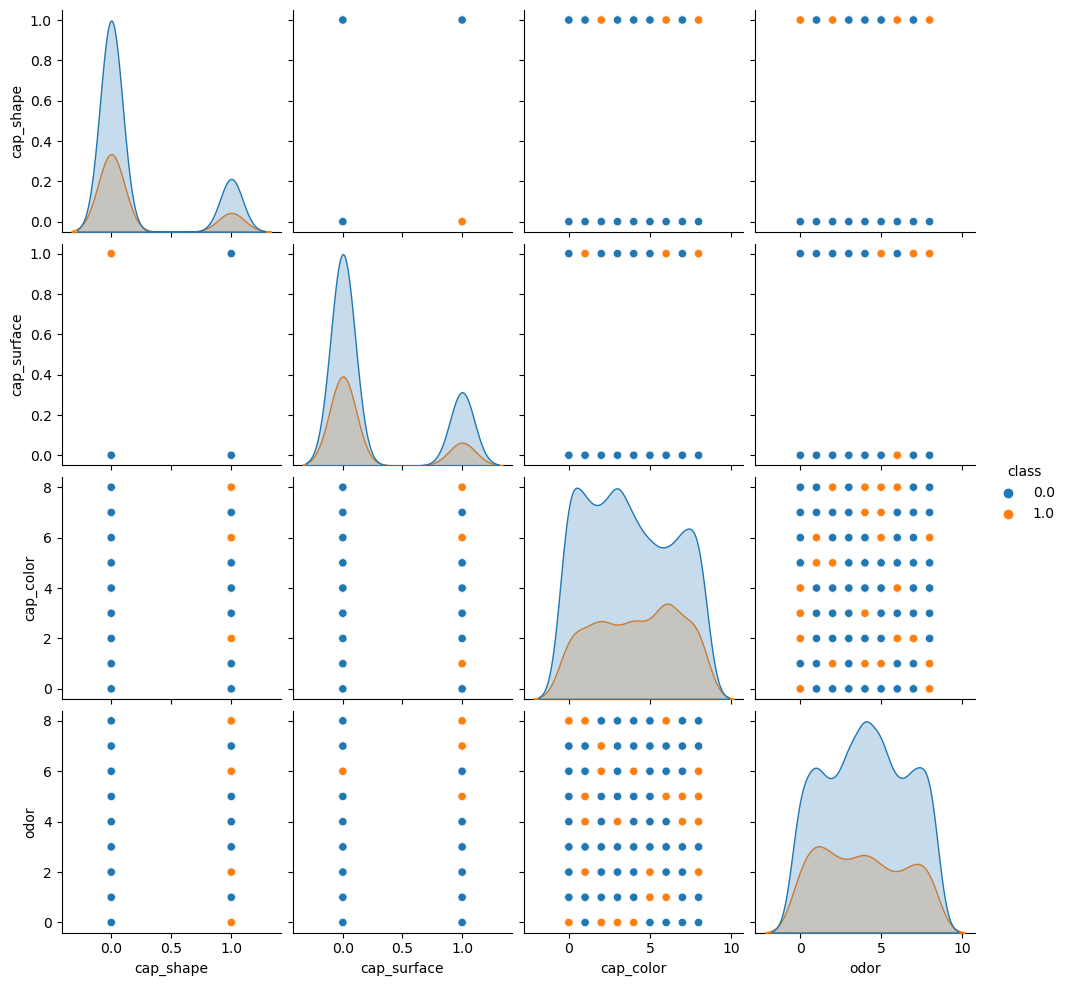

In [64]:
# Select a subset of features for pair plots
subset_columns = ['cap_shape', 'cap_surface', 'cap_color', 'odor', 'class']
subset_data = df[subset_columns]

# Plot pair plots
sns.pairplot(subset_data, hue='class')
plt.show()


We'll visualize the distribution of the target variable to check for balance or imbalance.

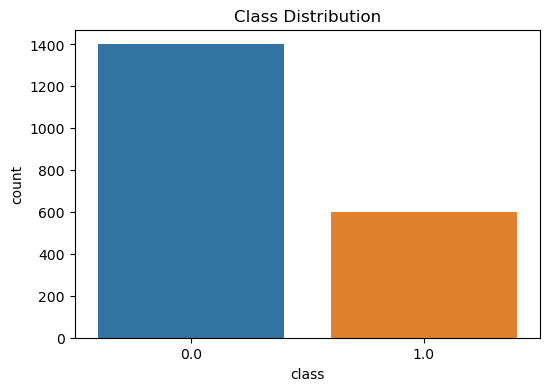

In [65]:
# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

## SVM Implementation

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [81]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear',C=0.1, random_state=42)

In [82]:
# Train the SVM model
svm_classifier.fit(x_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [83]:
# Predict on the test data
y_pred = svm_classifier.predict(x_test)

In [84]:
accuracy_score(y_test,y_pred)

0.692

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82       346
         1.0       0.00      0.00      0.00       154

    accuracy                           0.69       500
   macro avg       0.35      0.50      0.41       500
weighted avg       0.48      0.69      0.57       500



## Visualization of SVM Results

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

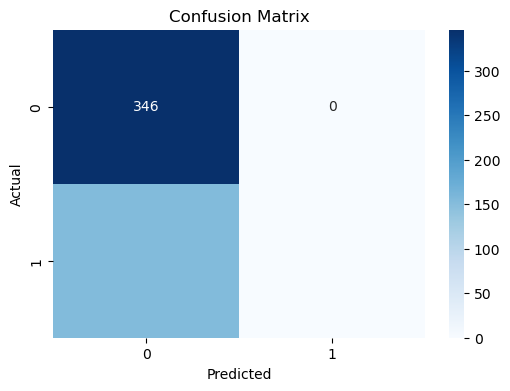

In [74]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##  Parameter Tuning and Optimization

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
# Define the parameter grid
param_grid = { 'C': [0.1, 1],'kernel': ['linear', 'poly', 'rbf']}

In [77]:
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid,verbose=2)

In [78]:
# Perform grid search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time= 2.9min
[CV] END ...............................C=0.1, kernel=linear; total time= 1.4min
[CV] END ...............................C=0.1, kernel=linear; total time= 2.7min
[CV] END ...............................C=0.1, kernel=linear; total time= 2.0min
[CV] END ...............................C=0.1, kernel=linear; total time= 1.6min
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'kernel': ['linear', 'poly', 'rbf']},
             verbose=2)

In [79]:
grid_search.best_params_

{'C': 0.1, 'kernel': 'linear'}

For the Mushroom dataset, SVM shows strong performance due to its ability to handle high-dimensional spaces and generalize well with proper parameter tuning. However, the computational time and the need for careful parameter selection are some of the drawbacks. Despite these challenges, SVM remains a powerful tool for classification tasks when the strengths outweigh the weaknesses, as is the case with the Mushroom dataset